
# <span style="color:crimson">Milestone 2</span>

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
df = pd.read_csv("cardio_cleaned.csv")

print("Shape:", df.shape)
df.head()

Shape: (69813, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI,pulse_pressure
0,18393,1,168.0,62.0,110,80,1,1,0,0,3,21.967120,30
1,20228,0,156.0,85.0,140,90,3,1,1,0,4,34.927679,50
2,18857,0,165.0,64.0,130,70,3,1,1,1,3,23.507805,60
3,17623,1,169.0,82.0,150,100,1,1,1,0,4,28.710479,50
4,17474,0,156.0,56.0,100,60,1,1,0,1,1,23.011177,40


In [3]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI,pulse_pressure
count,69813.000000,69813.000000,69813.000000,69813.000000,69813.00000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000
mean,19468.591738,0.349548,164.406765,73.962122,126.30543,81.492845,1.366995,1.226333,0.499334,0.426153,2.952745,27.401829,44.812585
std,2467.635103,0.476831,7.825718,13.565401,15.53453,9.215858,0.680307,0.572067,0.500003,0.775182,0.959779,4.983237,10.719598
min,10798.000000,0.000000,142.500000,37.500000,90.00000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.835627,5.000000
25%,17663.000000,0.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,3.000000,23.875115,40.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,3.000000,26.370238,40.000000
75%,21327.000000,1.000000,170.000000,82.000000,135.00000,90.000000,2.000000,1.000000,1.000000,1.000000,3.000000,30.120482,50.000000
max,23713.000000,1.000000,186.500000,113.500000,170.00000,105.000000,3.000000,3.000000,1.000000,4.000000,5.000000,55.894121,105.000000


# <span style="color:#fa3c78">Data Cleaning (Quick Check)</span>

In [4]:
print("Missing values:\n", df.isna().sum())

for col in ["cholesterol","gluc","lifestyle_risk","gender","ap_status"]:
    print(f"{col}: {df[col].unique()}")

print(f"\nnumber of duplicates: {df.duplicated().sum()}")

Missing values:
 age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
cardio            0
lifestyle_risk    0
ap_status         0
BMI               0
pulse_pressure    0
dtype: int64
cholesterol: [1 3 2]
gluc: [1 2 3]
lifestyle_risk: [0 1 3 2 4]
gender: [1 0]
ap_status: [3 4 1 2 5 0]



number of duplicates: 0


## Duplicates is possible so we will not remove them since they are only 24 record

# <span style="color:#fa3c78">Data Analysis</span>

# Hypothesis Testing

- ## Null hypothesis for numeric columns : (age, bmi, ap_hi, ap_lo)
- - ###  H0 : Each of these columns doesn't affect the cardio column

- ## Alternative hypothesis for numeric columns
- - ###  H1 : Each of these columns affects the cardio column

## Cohen's d Ranges [Here](https://www.statology.org/interpret-cohens-d/): 
### - 0.2 → small effect

### - 0.5 → medium effect

### - 0.8+ → large effect

In [5]:
cols = ['age','ap_hi','ap_lo','BMI',"pulse_pressure","height","weight"]
dict1 = {}
for col in cols:
    df_h0 = df[df['cardio'] == 0][f'{col}']
    df_h1 = df[df['cardio'] == 1][f'{col}']

    s1 , s2 = len(df_h0), len(df_h1)

    mean_h0 = df_h0.mean()
    mean_h1 = df_h1.mean()

    std_h0 = df_h0.std()
    std_h1 = df_h1.std()

    se = sqrt(std_h0**2/s1 + std_h1**2/s2)

    z = (mean_h0 - mean_h1)/se

    p_value = 2 * ( 1 - stats.norm.cdf(abs(z)))
    print(f'Column: {col}')
    print("Z-score:", z)
    print("P-value:", p_value)

    pooled_std = sqrt(((s1 - 1) * std_h0**2 + (s2 - 1) * std_h1**2) / (s1 + s2 - 2))

    cohen_d = (mean_h1 - mean_h0) / pooled_std
    
    p_cohen = abs(cohen_d)
    
    print("Cohen's d:", cohen_d)
    if p_value > 0.001:
        print('No effcet')
    elif p_cohen > 0 and p_cohen < 0.2:
        print('Very small effct')
    elif p_cohen >= 0.2 and p_cohen < 0.5:
        print('Small effect')
    elif p_cohen >= 0.5 and p_cohen < 0.8:
        print('Medium effect')
    else:
        print('Large effect')
        
    print('\n')
    dict1[col] = cohen_d

sorted_dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))

fig = px.bar(
    x=list(sorted_dict1.values())[::-1],
    y=list(sorted_dict1.keys())[::-1],
    orientation='h',
    text=list(sorted_dict1.values())[::-1],
    title="Effect Size (Cohen's D) for Numerical Features"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title="Cohen's D", yaxis_title="Features")
fig.show()


Column: age
Z-score: -64.78621874576412
P-value: 0.0
Cohen's d: 0.49035071957060977
Small effect


Column: ap_hi
Z-score: -149.88247014226377
P-value: 0.0
Cohen's d: 1.1352840292220472
Large effect


Column: ap_lo
Z-score: -107.37440198508754
P-value: 0.0
Cohen's d: 0.8129456922434737
Large effect


Column: BMI
Z-score: -54.777413261825316
P-value: 0.0
Cohen's d: 0.4147145230718683
Small effect


Column: pulse_pressure
Z-score: -112.394696868437
P-value: 0.0
Cohen's d: 0.8513263095937882
Large effect


Column: height
Z-score: 3.255712597195938
P-value: 0.0011310818153136282
Cohen's d: -0.024644669023366473
No effcet


Column: weight
Z-score: -51.85245973133298
P-value: 0.0
Cohen's d: 0.3925571147903245
Small effect




- ###  ap_hi --> Large effect (1.14)
- ###  ap_lo --> Large effect  (0.85)
- ###  pulse pressure --> Large effect (0.81)
- ###  Age --> Small effect close to medium (0.49)
- ###  BMI --> Small effect (0.39)
- ###  weight --> Small effect (0.39)
- ###  height --> No effect 


# Cramer's V Ranges [Here](https://www.statology.org/interpret-cramers-v/):
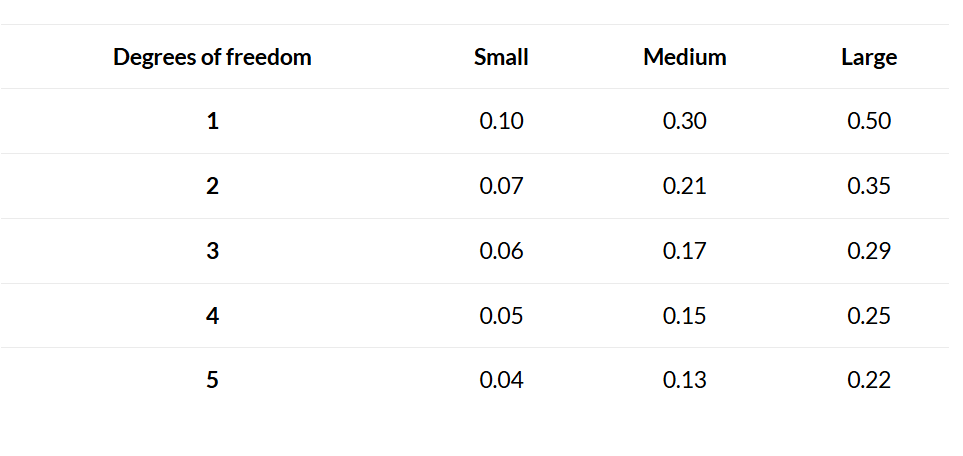

In [6]:
effect_thresholds = {
    1: {"small": 0.10, "medium": 0.30, "large": 0.50},
    2: {"small": 0.07, "medium": 0.21, "large": 0.35},
    3: {"small": 0.06, "medium": 0.17, "large": 0.29},
    4: {"small": 0.05, "medium": 0.15, "large": 0.25},
    5: {"small": 0.04, "medium": 0.13, "large": 0.22},
}

cols = ['cholesterol','gluc','gender','lifestyle_risk','ap_status']
dict2= {}

for col in cols:
    contingency_table = pd.crosstab(df[f'{col}'], df['cardio'])
    print(f'Column: {col}')
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"P-value: {p}")
    print(f"Chi-square statistic: {chi2}")
    print(f"Degrees of freedom: {dof}")
    
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    cramers_v = np.sqrt(chi2 / (n * (k - 1)))
    print(f"Cramer's V: {cramers_v}")
    dict2[col] = cramers_v
    
    thresholds = effect_thresholds.get(dof)

    if p > 0.001:
        print('No effect')
    elif cramers_v < thresholds["small"]:
        print("Very weak or no effect")
    elif cramers_v < thresholds["medium"]:
        print("Small effect")
    elif cramers_v < thresholds["large"]:
        print("Medium effect")
    else:
        print("Large effect")
    print('\n')

sorted_dict2 = dict(sorted(dict2.items(), key=lambda item: item[1], reverse=True))

fig = px.bar(
    x=list(sorted_dict2.values())[::-1],
    y=list(sorted_dict2.keys())[::-1], 
    orientation='h',
    text=list(sorted_dict2.values())[::-1],
    title="Effect Size (Cramer's V) for Categorical Features"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title="Cramer's V", yaxis_title="Features")
fig.show()

Column: cholesterol
P-value: 0.0
Chi-square statistic: 3411.688128978386
Degrees of freedom: 2
Cramer's V: 0.22106323022277252
Medium effect


Column: gluc
P-value: 1.606751557717765e-126
Chi-square statistic: 579.3030144849947
Degrees of freedom: 2
Cramer's V: 0.09109294518684441
Small effect


Column: gender
P-value: 0.034400483250064194
Chi-square statistic: 4.474687971160241
Degrees of freedom: 1
Cramer's V: 0.008005956532250173
No effect


Column: lifestyle_risk
P-value: 2.0822182731569993e-19
Chi-square statistic: 93.76894857651969
Degrees of freedom: 4
Cramer's V: 0.0366489361767842
Very weak or no effect


Column: ap_status
P-value: 0.0
Chi-square statistic: 10124.04598266841
Degrees of freedom: 5
Cramer's V: 0.3808104907854573
Large effect




- ### ap_status --> Large effect (0.38)
- ### Cholesterol --> Medium effect (0.22)
- ### gluc --> Small effect (0.09)
- ### lifstyle_risk --> Very weak or no effect (0.04)
- ### gender --> No effect (p value higehr than 0.001)

# <span style="color:#fa3c78">Data Visualization</span>

## Is the dataset still balanced between patients with and without cardiovascular disease after cleaning?


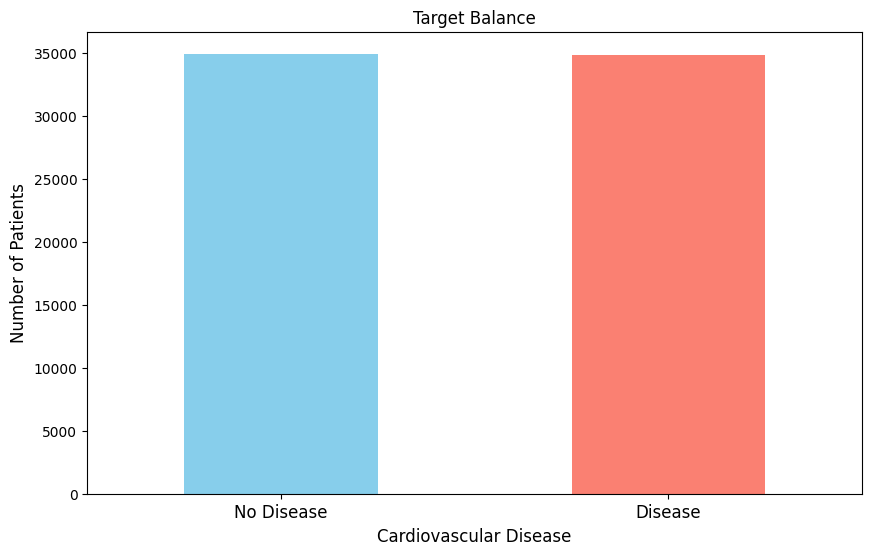

In [7]:
plt.figure(figsize=(10,6))
df['cardio'].value_counts().plot( kind="bar", color=["skyblue", "salmon"],rot=0)
plt.title("Target Balance", fontsize=12)
plt.xlabel("Cardiovascular Disease", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks([0,1], ["No Disease", "Disease"], fontsize=12)
plt.show()


### **Answer:** The dataset remains fairly balanced, with a nearly equal number of patients in both classes. This makes it suitable for classification without major rebalancing.


# <span style="color:#fa3c78">Investigate Age and Disease</span>

## Do older patients have a higher chance of cardiovascular disease?

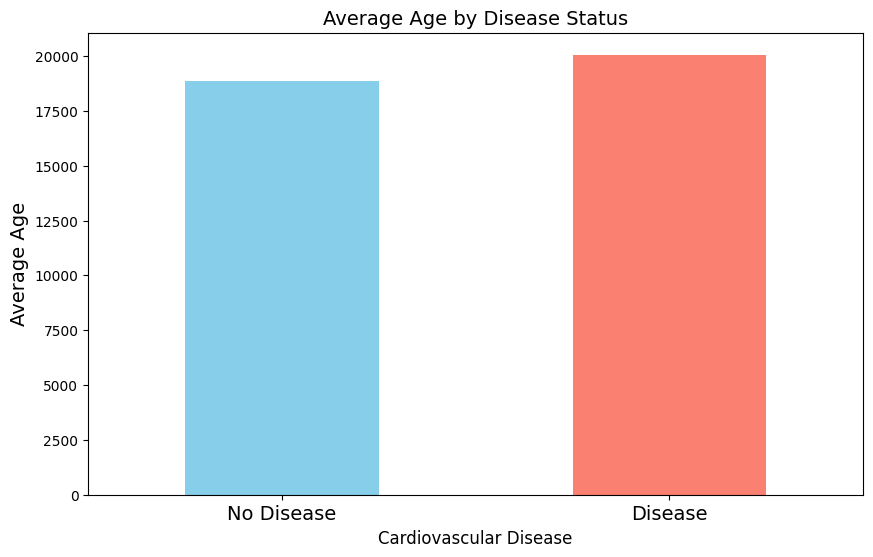

In [8]:
plt.figure(figsize=(10,6))
df.groupby("cardio")["age"].mean().plot(kind="bar", color=["skyblue", "salmon"],rot=0)
plt.title("Average Age by Disease Status",fontsize=14)
plt.ylabel("Average Age", fontsize=14)
plt.xlabel("Cardiovascular Disease", fontsize=12)
plt.xticks([0,1], ["No Disease", "Disease"],fontsize=14)
plt.show()

**Answer:** Patients with cardiovascular disease are, on average, older (55 years) compared to those without (52 years). This supports the medical understanding that age is a major risk factor.


### Do diseased and non-diseased patients show different age distributions, or is the difference only in the averages?


In [9]:
fig = px.histogram(df, x=df["age"] / 365, color='cardio', barmode='overlay',nbins=30, opacity=0.6,color_discrete_map={0:'#4B9CD3',1:'#F08080'},labels={'cardio':'Disease (0=No,1=Yes)','age':'Age'},title='Age Distribution by Disease Status')
fig.update_yaxes(title='Count')
fig.show()


**Answer:** This confirms that the difference is **systematic across the whole population**, not just due to a few older patients pulling up the average.

### How does the percentage of patients with cardiovascular disease change across age groups?

In [10]:

bins = [38, 45, 50, 55, 60, 65]
df["age_group"] = pd.cut(df["age"] / 365, bins=bins)
counts = df.groupby(["age_group", "cardio"]).size().reset_index(name="count")
counts["age_group"] = counts["age_group"].astype(str)

fig = go.Figure()

for val in counts["cardio"].unique():
    subset = counts[counts["cardio"] == val]
    fig.add_trace(
        go.Bar(
            x=subset["age_group"],
            y=subset["count"],
            name=f"Cardio={val}",
            text=subset["count"],       
            textposition="inside"        
        )
    )
fig.update_layout(
    title="Cardiovascular Disease Counts by Age Group",
    barmode="stack",
    xaxis_title="Age Group",
    yaxis_title="Count"
)
fig.show()


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_26128\1577485653.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_26128\28275169.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



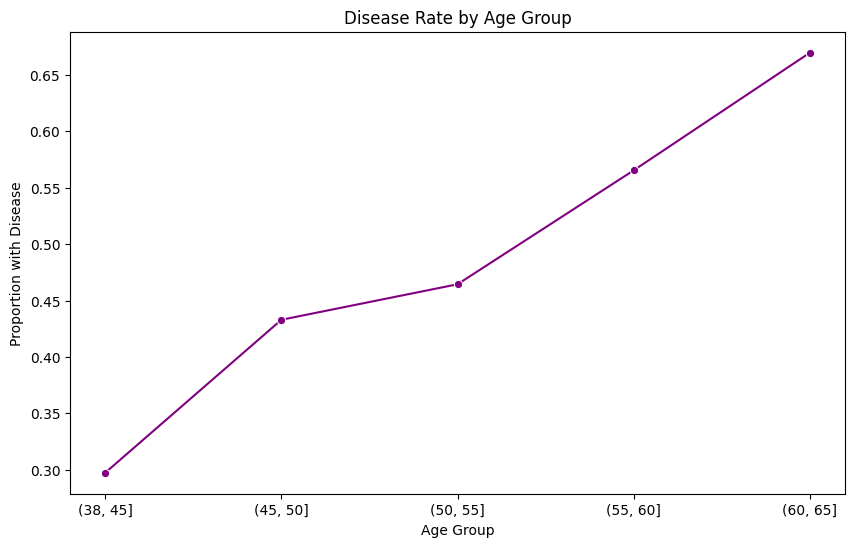

age_group
(38, 45]    10244
(45, 50]    11129
(50, 55]    17267
(55, 60]    18179
(60, 65]    12990
Name: count, dtype: int64

In [11]:
df["age_group"] = pd.cut(df["age"] / 365, bins=[38,45,50,55,60,65])


age_rates = df.groupby("age_group")["cardio"].mean().reset_index()

# Convert bin labels to string for plotting
age_rates["age_group"] = age_rates["age_group"].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(x="age_group", y="cardio", data=age_rates, marker="o", color="purple")
plt.title("Disease Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion with Disease")
plt.show()

df["age_group"].value_counts().sort_index()


**Answer:**  
- The percentage of patients with cardiovascular disease rises steadily with age:  
  - 33% in ages 39–44  
  - 42% in ages 45–49  
  - 49% in ages 50–54  
  - 57% in ages 55–59  
  - 69% in ages 60–64  
- This clear upward trend confirms that **the risk of cardiovascular disease increases sharply as patients get older**.


# **Conclusion:** Age is a strong and reliable risk factor for cardiovascular disease, confirming clinical expectations. 

# <span style="color:#fa3c78">Investigate Blood Pressure</span>

## Do patients with cardiovascular disease have lower or higher systolic blood pressure?

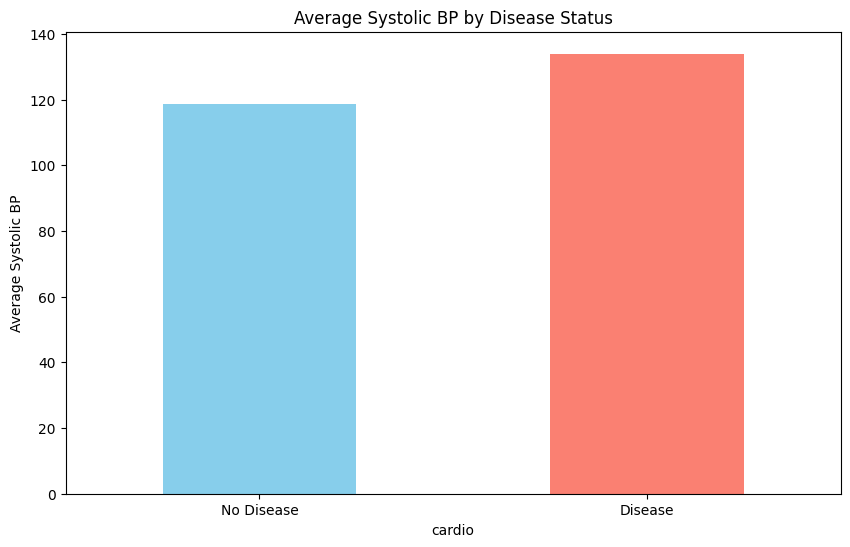

In [12]:
plt.figure(figsize=(10,6))
df.groupby("cardio")["ap_hi"].mean().plot(kind="bar", color=["skyblue","salmon"], rot=0)
plt.title("Average Systolic BP by Disease Status")
plt.ylabel("Average Systolic BP")
plt.xticks([0,1], ["No Disease","Disease"])
plt.show()

In [13]:
import plotly.figure_factory as ff
d0 = df.loc[df['cardio']==0, 'ap_hi'].dropna()
d1 = df.loc[df['cardio']==1, 'ap_hi'].dropna()

fig = ff.create_distplot([d0, d1], group_labels=["No Disease","Disease"],colors=["#4B9CD3","#F08080"],bin_size=(df['ap_hi'].max()-df['ap_hi'].min())/40,show_hist=True, show_rug=False)
fig.update_layout(title="Systolic BP Distribution by Disease Status")
fig.update_xaxes(title="Systolic BP")
fig.update_yaxes(title="Density")
fig.show()

## Do patients with cardiovascular disease have lower or higher Diastolic blood pressure?

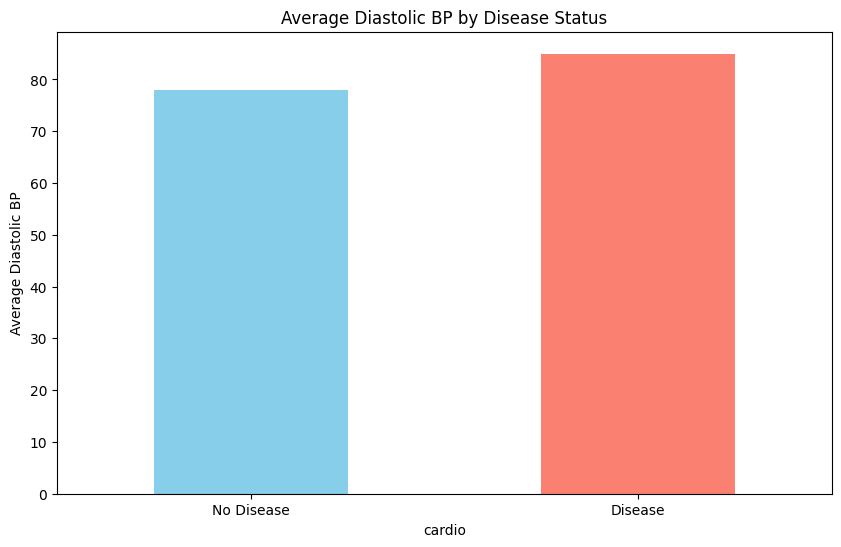

In [14]:
plt.figure(figsize=(10,6))
df.groupby("cardio")["ap_lo"].mean().plot(kind="bar", color=["skyblue","salmon"], rot=0)
plt.title("Average Diastolic BP by Disease Status")
plt.ylabel("Average Diastolic BP")
plt.xticks([0,1], ["No Disease","Disease"])
plt.show()


In [15]:

d0 = df.loc[df['cardio']==0, 'ap_lo'].dropna()
d1 = df.loc[df['cardio']==1, 'ap_lo'].dropna()

fig = ff.create_distplot([d0, d1], group_labels=["No Disease","Disease"],colors=["#4B9CD3","#F08080"],bin_size=(df['ap_lo'].max()-df['ap_lo'].min())/40,show_hist=True, show_rug=False)
fig.update_layout(title="Diastolic BP Distribution by Disease Status")
fig.update_xaxes(title="Diastolic BP")
fig.update_yaxes(title="Density")
fig.show()

# How does the percentage of patients with cardiovascular disease change across blood pressure categories?


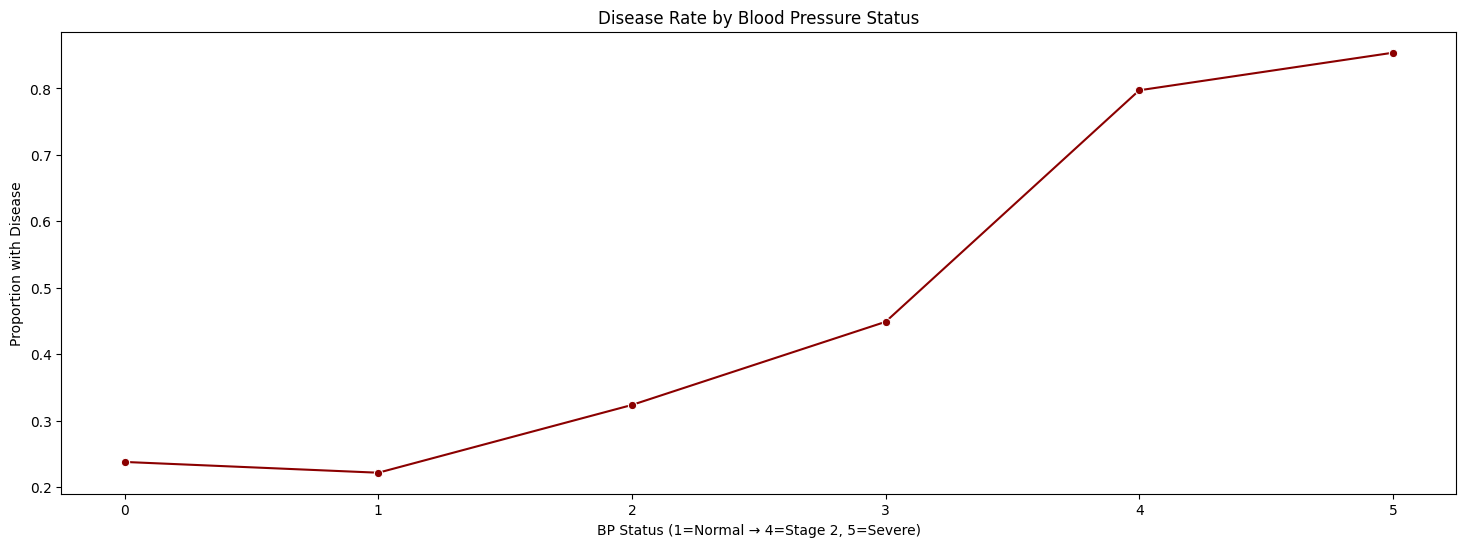

In [16]:
plt.figure(figsize=(18,6))
bp_rates = df.groupby("ap_status")["cardio"].mean().reset_index()
sns.lineplot(x="ap_status", y="cardio", data=bp_rates, marker="o", color="darkred")
plt.title("Disease Rate by Blood Pressure Status")
plt.xlabel("BP Status (1=Normal → 4=Stage 2, 5=Severe)")
plt.ylabel("Proportion with Disease")
plt.show()


In [17]:
ct = pd.crosstab(df["ap_status"],df["cardio"]).reset_index()

ct.columns = ["ap_status", "No Disease (0)", "Has Disease (1)"]

label_map = {\
    0: "Hypotension",
    1: "Normal",
    2: "Elevated",
    3: "Stage 1 Hypertension",
    4: "Stage 2 Hypertension",
    5: "Severe Hypertension"
}
ct["ap_status"] = ct["ap_status"].map(label_map)

ct_melt = ct.melt(
    id_vars="ap_status",
    value_vars=["No Disease (0)", "Has Disease (1)"],
    var_name="Cardio",
    value_name="Count"
)

fig = px.bar(
    ct_melt, x="ap_status", y="Count", color="Cardio",
    title="Blood Pressure Categories vs Cardiovascular Disease",
    text="Count",
    labels={"ap_status": "Blood Pressure Category", "Count": "Number of Patients"},
    barmode="stack"
)

fig.show()

**Answer**:

- **Normal:** 23% Cardio 
- **Elevated:** 33% Cardio 
- **Stage 1 Hypertension:** 45% Cardio 
- **Stage 2 Hypertension:** 80% Cardio  
- **Severe Hypertension:** 85% Cardio  

Blood pressure is one of the strongest predictors of cardiovascular disease. The risk rises gradually from Normal to Stage 1, but increases sharply from Stage 2 onward, confirming the critical role of hypertension in heart disease.

# Conclusion:
- Diseased patients show **higher systolic and diastolic BP** than healthy ones. 
- Blood pressure is one of the **strongest predictors** of cardiovascular disease.

# <span style="color:#fa3c78">Cholesterol</span>

# Is cholesterol higher among patients with cardiovascular disease?

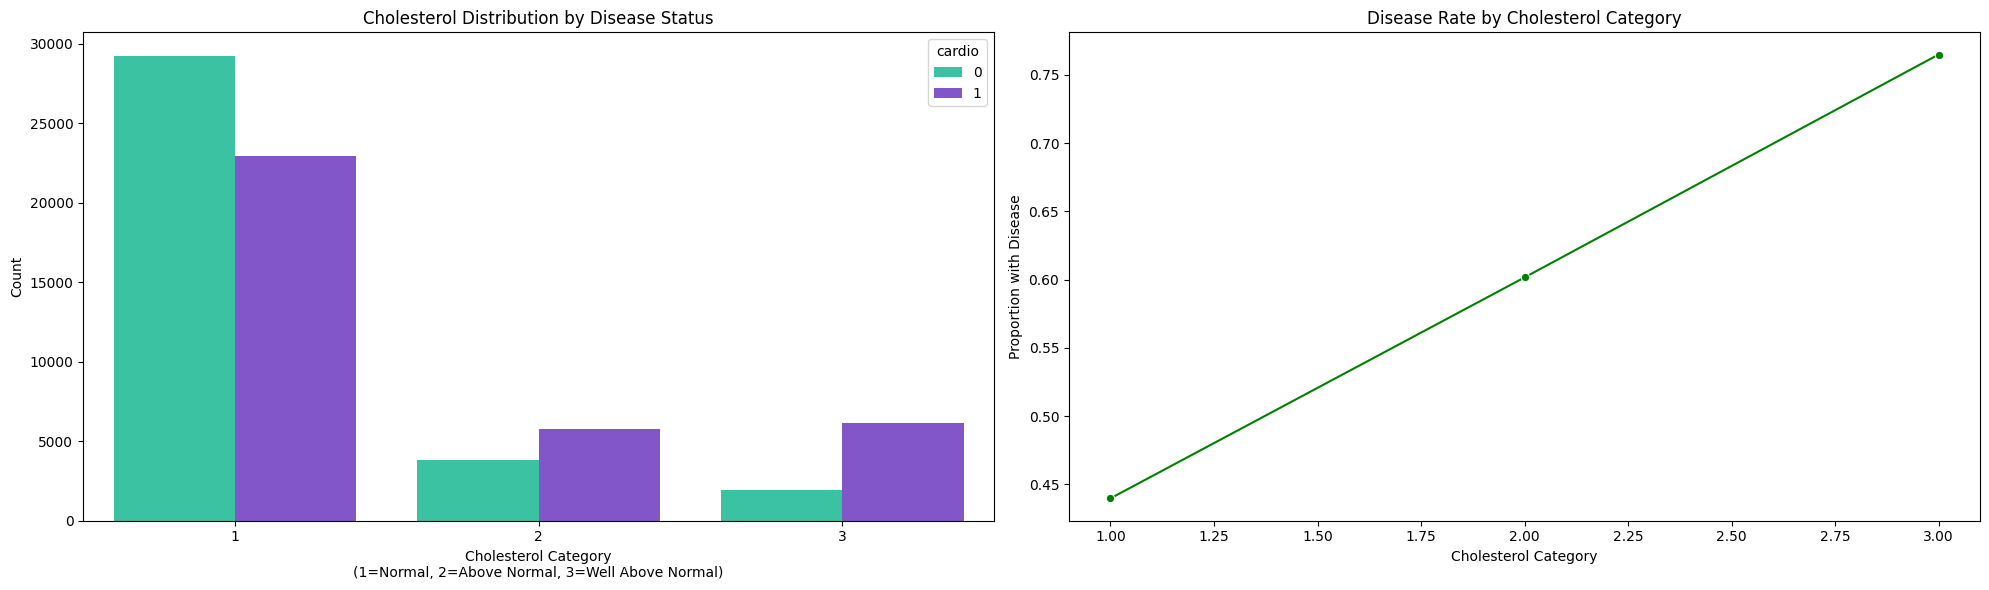

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))
df

sns.countplot(x="cholesterol", hue="cardio", data=df, palette=["#24D9AF","#7E43DC"], ax=axes[0])
axes[0].set_title("Cholesterol Distribution by Disease Status")
axes[0].set_xlabel("Cholesterol Category\n(1=Normal, 2=Above Normal, 3=Well Above Normal)")
axes[0].set_ylabel("Count")

chol_rates = df.groupby("cholesterol")["cardio"].mean().reset_index()
sns.lineplot(x="cholesterol", y="cardio", data=chol_rates, marker="o", color="green", ax=axes[1])
axes[1].set_title("Disease Rate by Cholesterol Category")
axes[1].set_xlabel("Cholesterol Category")
axes[1].set_ylabel("Proportion with Disease")

plt.tight_layout()
plt.show()


# Conclusion: 
- Patients with cardiovascular disease show **higher average cholesterol** than healthy ones.  
- The distribution shows diseased patients are more concentrated in the **“Above Normal” and “Well Above Normal”** categories.  
- Disease risk rises steadily with cholesterol level:
  - Normal: ~45% diseased  
  - Above Normal: ~60% diseased  
  - Well Above Normal: ~77% diseased  
- This confirms cholesterol as a **major risk factor** for cardiovascular disease.


# <span style="color:#fa3c78">Glucose</span>

# Do patients with cardiovascular disease have higher glucose levels?

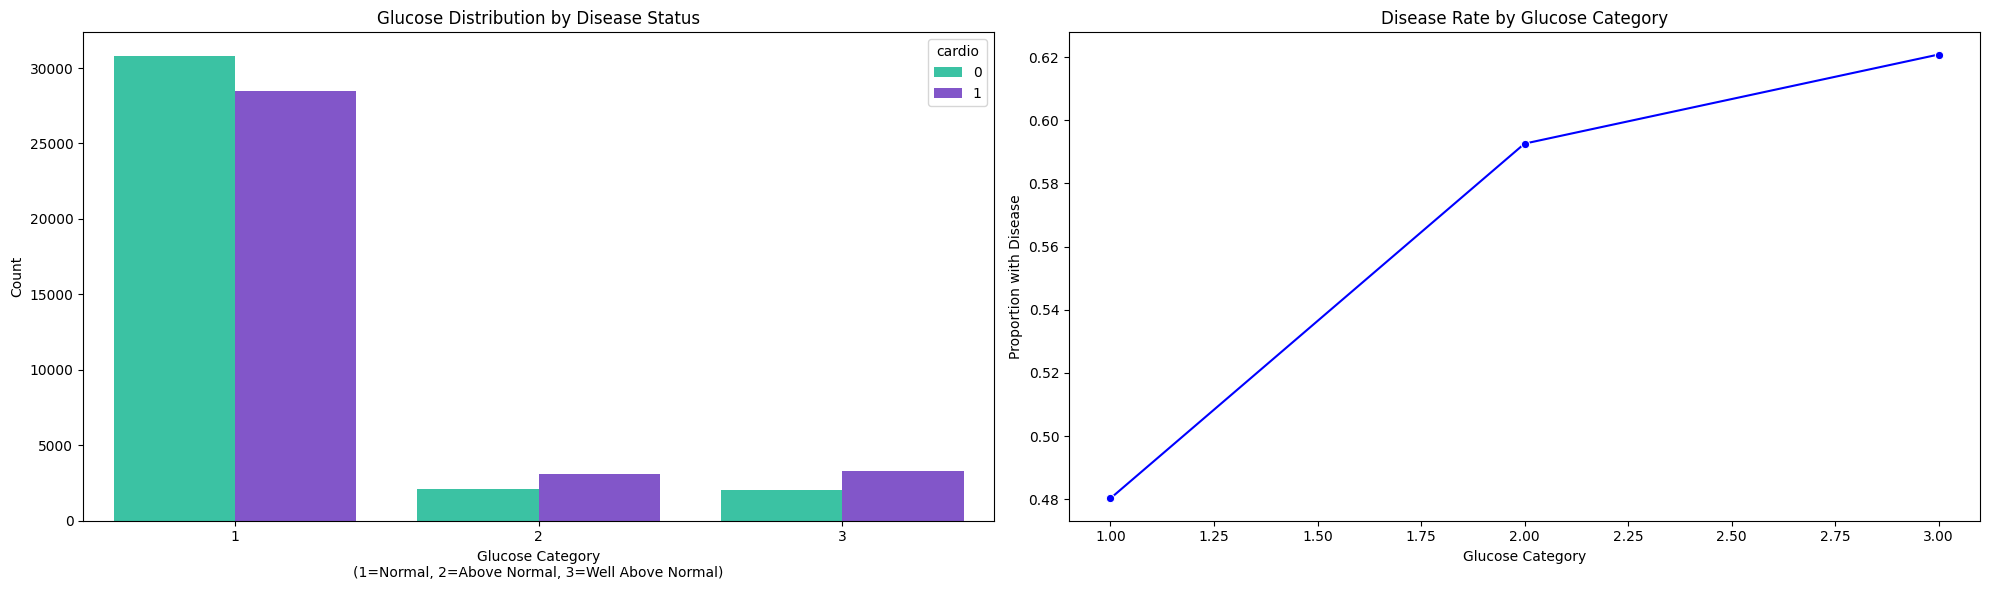

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))



sns.countplot(x="gluc", hue="cardio", data=df, palette=["#24D9AF","#7E43DC"], ax=axes[0])
axes[0].set_title("Glucose Distribution by Disease Status")
axes[0].set_xlabel("Glucose Category\n(1=Normal, 2=Above Normal, 3=Well Above Normal)")
axes[0].set_ylabel("Count")

gluc_rates = df.groupby("gluc")["cardio"].mean().reset_index()
sns.lineplot(x="gluc", y="cardio", data=gluc_rates, marker="o", color="blue", ax=axes[1])
axes[1].set_title("Disease Rate by Glucose Category")
axes[1].set_xlabel("Glucose Category")
axes[1].set_ylabel("Proportion with Disease")

plt.tight_layout()
plt.show()


# Conclusion: 
- Patients with cardiovascular disease have **slightly higher average glucose levels** compared to healthy ones.  
- Distribution shows diseased patients are more represented in the **Above Normal** and **Well Above Normal** glucose categories.  
- Disease risk rises with glucose level:
  - Normal: ~47% diseased  
  - Above Normal: ~59% diseased  
  - Well Above Normal: ~62% diseased  
- Glucose is therefore a **moderate but significant risk factor** for cardiovascular disease.


# <span style="color:#fa3c78">Smoking, Alcohol, and Physical activity</span>

# Do lifestyle_risk affect cardiovascular disease risk?

In [20]:
df["cardio_label"] = df["cardio"].map({0: "No Disease", 1: "Has Disease"}).fillna(df["cardio"])

counts = df.groupby(["lifestyle_risk", "cardio_label"]).size().reset_index(name="count")


fig = px.bar(
    counts,
    x="lifestyle_risk",
    y="count",
    color="cardio_label",
    barmode="stack",
    title="Lifestyle Risk vs Cardiovascular Disease",
    labels={"lifestyle_risk": "Lifestyle Risk", "cardio_label": "Cardiovascular Disease"}
)

fig.update_traces(texttemplate='%{y}', textposition="inside")

fig.show()




# <span style="color:#fa3c78">Gender</span>

# Are men or women more likely to have cardiovascular disease?

In [21]:
gender_map = {0: "Female", 1: "Male"} 
df["gender_label"] = df["gender"].map(gender_map).fillna(df["gender"])

df["cardio_label"] = df["cardio"].map({0: "No Disease", 1: "Has Disease"}).fillna(df["cardio"])

fig = px.histogram(
    df,
    x="gender_label",
    color="cardio_label",
    barmode="stack",
    title="Gender vs Cardiovascular Disease",
    labels={"gender_label": "Gender", "cardio_label": "Cardiovascular Disease"}
)

fig.update_traces(texttemplate='%{y}', textposition="inside")
fig.show()



# Does BMI has any effect  on Cardio vascular disease?

In [22]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, 60]  
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese I", "Obese II", "Obese III"]

df["bmi_status"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels, right=False)

ct = pd.crosstab(df["bmi_status"], df["cardio"]).reset_index()
ct.columns = ["bmi_status", "No Disease (0)", "Has Disease (1)"]

ct_melt = ct.melt(
    id_vars="bmi_status",
    value_vars=["No Disease (0)", "Has Disease (1)"],
    var_name="Cardio",
    value_name="Count"
)

fig = px.bar(
    ct_melt,
    x="bmi_status",
    y="Count",
    color="Cardio",
    text="Count",
    barmode="stack",
    labels={"bmi_status": "BMI Category", "Count": "Number of Patients"},
    title="BMI Categories vs Cardiovascular Disease"
)

fig.show()



### Answer : Yes as BMI increase the percent of people in this category that has the disease increase

# <span style="color:#fa3c78">correlations</span>

# Which features correlate the most with cardiovascular disease?

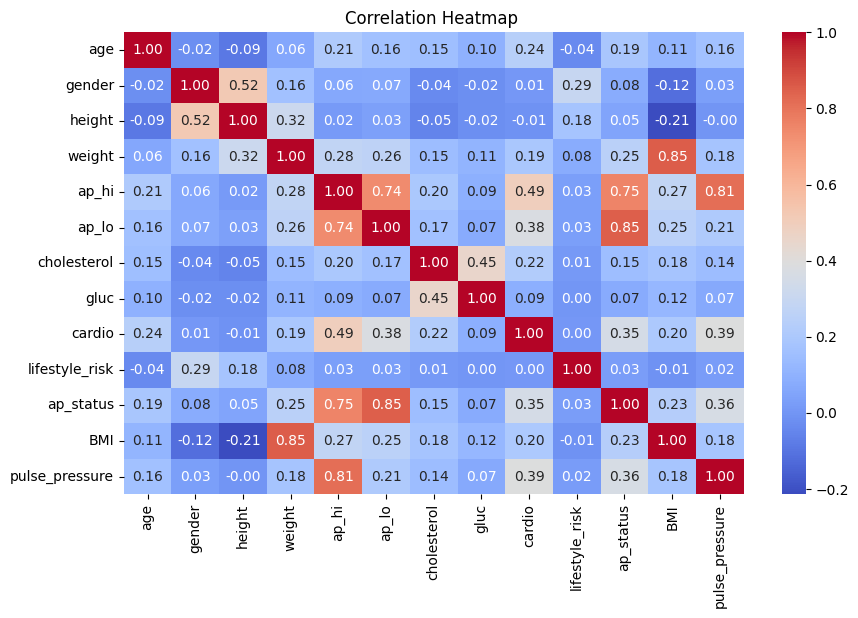

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap ")
plt.show()
